In [1025]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
import scipy.stats as stats

In [993]:
TEST_SIZE = 0.33
RANDOM_STATE = 42

sns.set_style("darkgrid")

In [994]:
house_sell_df = pd.read_csv("dataset.csv")

house_sell_df.shape

(200, 6)

In [995]:
house_sell_df.head(10)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
5,24.0,70000.0,Feminino,9.130098,Sim,1
6,39.0,100000.0,Feminino,14.746809,Sim,1
7,50.0,100000.0,Masculino,23.246508,Não,0
8,34.0,30000.0,Masculino,27.056464,Sim,1
9,41.0,70000.0,Masculino,21.773575,Sim,0


In [996]:
filtered_df = house_sell_df.dropna(subset=['Gênero'])

encoder = LabelEncoder()
encoded_values = encoder.fit_transform(filtered_df['Gênero'])

house_sell_df.loc[filtered_df.index, 'Gênero'] = encoded_values

filtered_df = house_sell_df.dropna(subset=['Anúncio Clicado'])

encoder = LabelEncoder()
encoded_values = encoder.fit_transform(filtered_df['Anúncio Clicado'])

house_sell_df.loc[filtered_df.index, 'Anúncio Clicado'] = encoded_values

house_sell_df[['Gênero', 'Anúncio Clicado']] = house_sell_df[['Gênero', 'Anúncio Clicado']].astype('Int32')

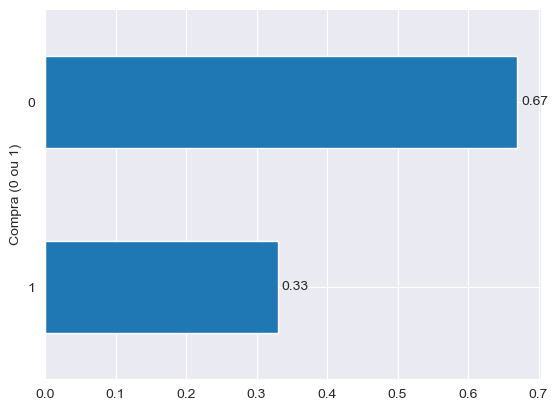

In [997]:
ax = house_sell_df['Compra (0 ou 1)'].value_counts(normalize=True).sort_values().plot(kind='barh')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

sns.despine()
plt.show()

In [998]:
house_sell_df.describe()

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
count,190.000000,189.000000,193.0,200.000000,190.0,200.000000
mean,38.510526,58253.968254,0.512953,17.349090,0.563158,0.330000
std,12.679918,25612.061811,0.501132,7.724088,0.497305,0.471393
min,18.000000,30000.000000,0.0,-1.000000,0.0,0.000000
25%,28.000000,30000.000000,0.0,10.860240,0.0,0.000000
50%,38.000000,50000.000000,1.0,18.197552,1.0,0.000000
75%,50.000000,70000.000000,1.0,23.887341,1.0,1.000000
max,59.000000,100000.000000,1.0,29.853484,1.0,1.000000


In [999]:
house_sell_df.loc[house_sell_df['Tempo no Site (min)'] < 0, 'Tempo no Site (min)'] = np.nan

house_sell_df.describe()

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
count,190.000000,189.000000,193.0,195.000000,190.0,200.000000
mean,38.510526,58253.968254,0.512953,17.819580,0.563158,0.330000
std,12.679918,25612.061811,0.501132,7.231815,0.497305,0.471393
min,18.000000,30000.000000,0.0,5.052596,0.0,0.000000
25%,28.000000,30000.000000,0.0,11.715915,0.0,0.000000
50%,38.000000,50000.000000,1.0,18.312317,1.0,0.000000
75%,50.000000,70000.000000,1.0,23.943929,1.0,1.000000
max,59.000000,100000.000000,1.0,29.853484,1.0,1.000000


In [1000]:
house_sell_df.isna().sum()

Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     5
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64

In [1001]:
y = house_sell_df['Compra (0 ou 1)']

df_train, _ = train_test_split(house_sell_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

df_train

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
43,21.0,70000.0,0,20.946927,0,0
122,NaN,50000.0,0,10.842802,0,0
21,27.0,30000.0,0,26.789943,1,0
146,37.0,50000.0,0,21.622793,0,0
7,50.0,100000.0,1,23.246508,0,0
...,...,...,...,...,...,...
117,29.0,70000.0,1,13.874908,0,0
12,58.0,50000.0,1,12.418191,1,1
34,57.0,70000.0,0,21.152404,0,1
4,59.0,50000.0,0,28.235667,1,1


In [1002]:
class KNNClassImputer(KNNImputer, TransformerMixin):
    def __init__(self, columns, n_neighbors=5, weights='uniform', metric='nan_euclidean'):
        self.columns = columns
        self.imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights, metric=metric)
    
    def fit(self, X, y=None):
        self.imputer.fit(X[self.columns])
        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        imputed_values = self.imputer.transform(X[self.columns])
        imputed_values = np.round(imputed_values)
        X_imputed[self.columns] = imputed_values
        return X_imputed

In [1003]:
pipeline = Pipeline([
    ('knn_categorical', KNNClassImputer(columns=['Gênero', 'Anúncio Clicado'], weights='distance')),
    ('knn_numerical', KNNImputer(n_neighbors=5, weights='distance'))
])

df_train.iloc[:, :-1] = pipeline.fit_transform(df_train.iloc[:, :-1])

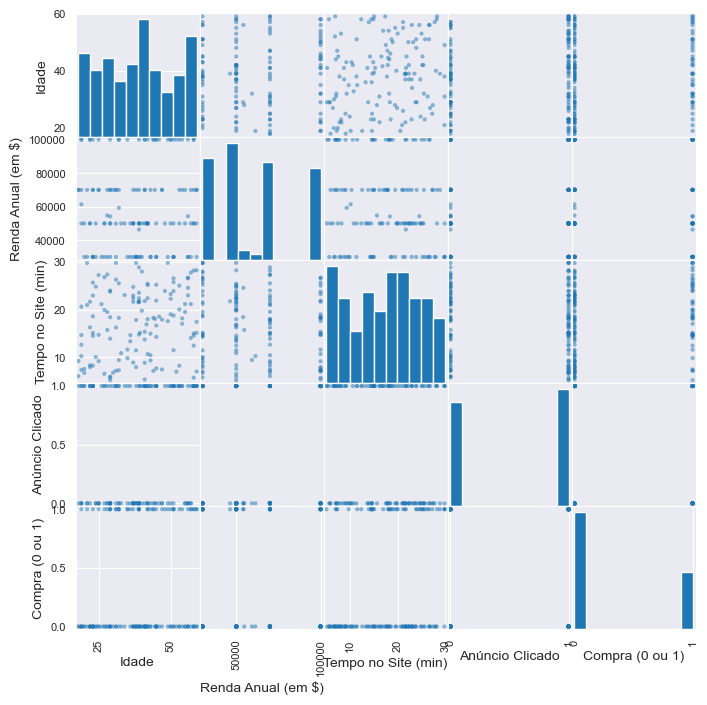

In [1014]:
pd.plotting.scatter_matrix(df_train, diagonal='hist', figsize=(8, 8))

plt.show()

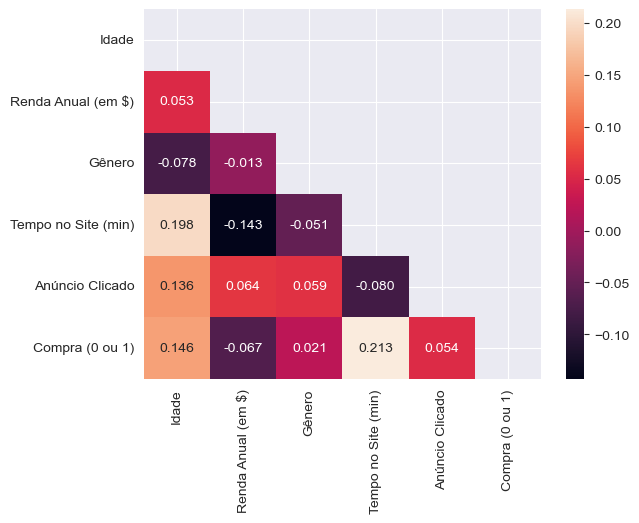

In [1005]:
pearson_correlation = df_train.corr()

sns.heatmap(pearson_correlation, annot=True, fmt='.3f', mask=np.triu(pearson_correlation))

plt.show()

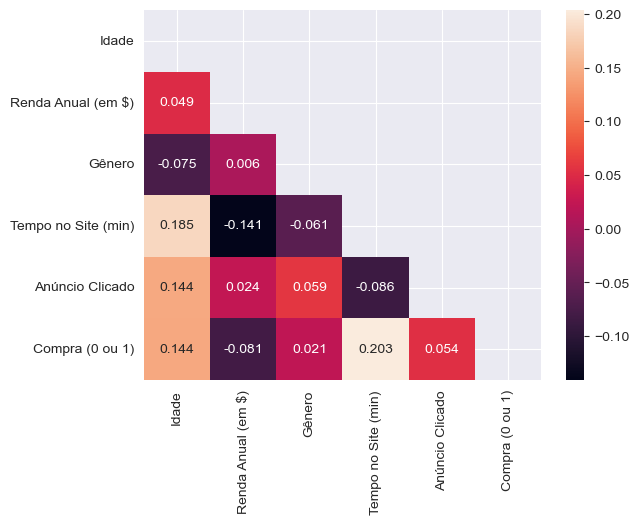

In [1006]:
spearman_correlation = df_train.corr(method='spearman')

sns.heatmap(spearman_correlation, annot=True, fmt='.3f', mask=np.triu(spearman_correlation))

plt.show()

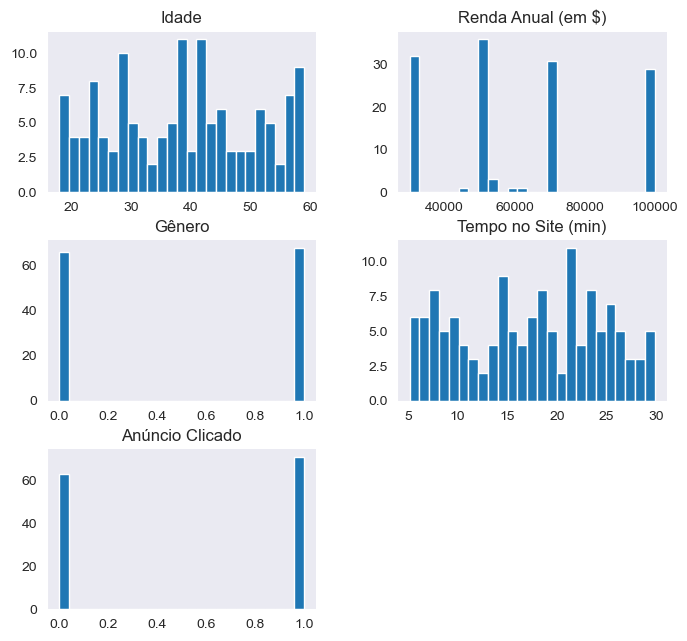

In [1007]:
df_train.iloc[:, :-1].hist(grid=False, figsize=(8, 7.5), bins=25)

sns.despine()
plt.show()

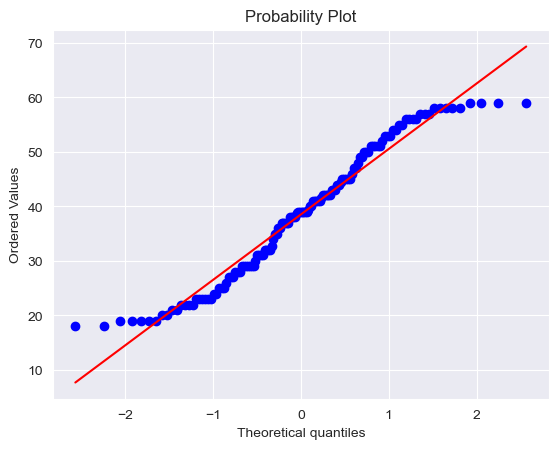

In [1027]:
stats.probplot(df_train['Idade'], dist="norm", plot=plt)

plt.show()

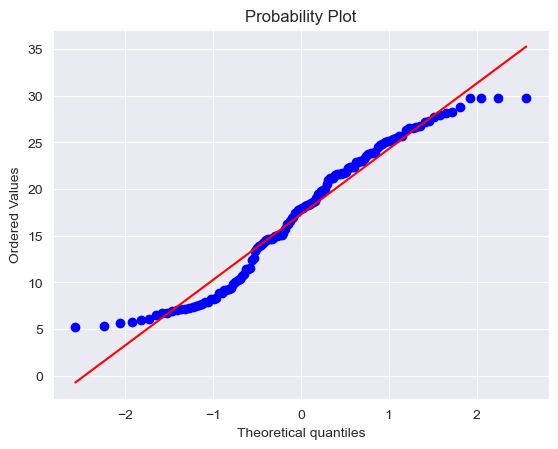

In [1028]:
stats.probplot(df_train['Tempo no Site (min)'], dist="norm", plot=plt)

plt.show()

<Axes: xlabel='Idade', ylabel='Tempo no Site (min)'>

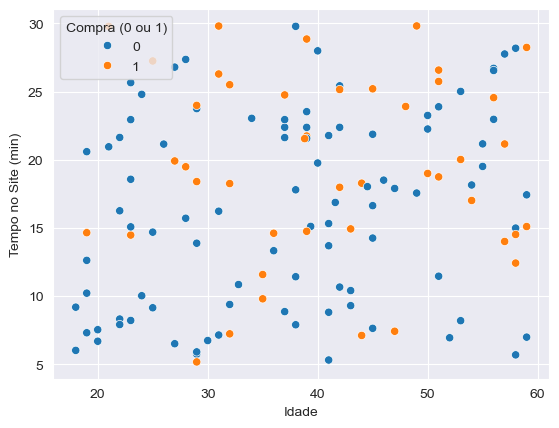

In [1008]:
sns.scatterplot(data=df_train, x='Idade', y='Tempo no Site (min)', hue='Compra (0 ou 1)')

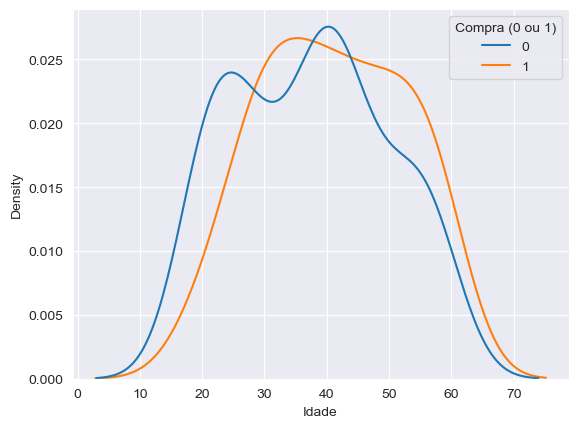

                 count       mean        std   min    25%   50%   75%   max
Compra (0 ou 1)                                                            
0                 90.0  37.280966  12.255179  18.0  26.25  38.0  45.0  59.0
1                 44.0  41.018507  11.492932  19.0  31.75  40.5  51.0  59.0


In [1009]:
def kdeplot_describe(column, data=df_train):
    sns.kdeplot(data=data, x=column, hue='Compra (0 ou 1)', common_norm=False)
    
    plt.show()
    
    print(df_train.groupby('Compra (0 ou 1)')[column].describe())

kdeplot_describe(column='Idade')

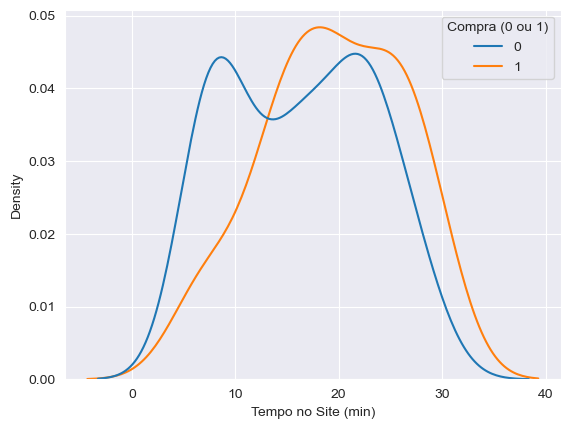

                 count       mean       std       min        25%        50%  \
Compra (0 ou 1)                                                               
0                 90.0  16.221973  7.042950  5.307743   9.212048  16.441612   
1                 44.0  19.422028  6.732322  5.167760  14.636645  19.236935   

                       75%        max  
Compra (0 ou 1)                        
0                22.341575  29.781581  
1                25.161243  29.812088  


In [1010]:
kdeplot_describe(column='Tempo no Site (min)')

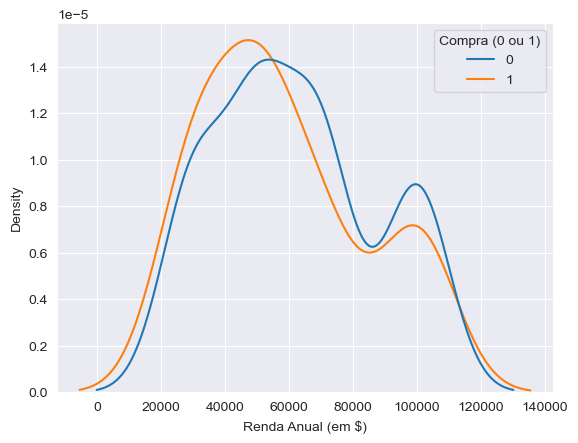

                 count          mean           std      min      25%  \
Compra (0 ou 1)                                                        
0                 90.0  62060.111995  24711.382764  30000.0  50000.0   
1                 44.0  58515.765431  25223.606407  30000.0  30000.0   

                          50%      75%       max  
Compra (0 ou 1)                                   
0                57018.482355  70000.0  100000.0  
1                50000.000000  70000.0  100000.0  


In [1011]:
kdeplot_describe(column='Renda Anual (em $)')

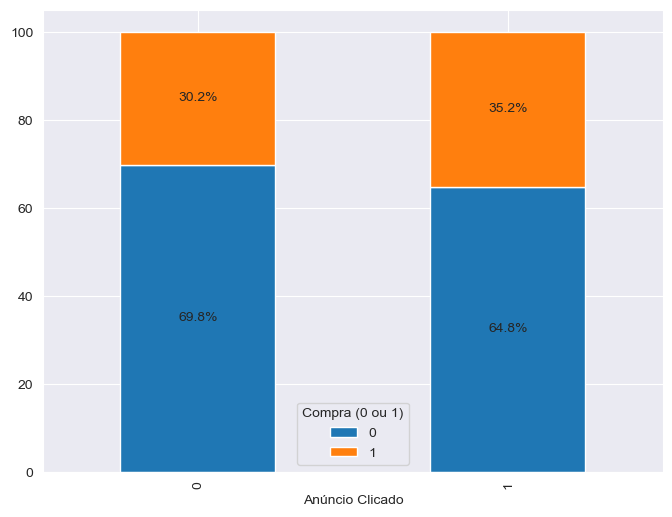

In [1012]:
counts = df_train.groupby(['Anúncio Clicado', 'Compra (0 ou 1)']).size().unstack(fill_value=0)

percentages = counts.div(counts.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6))

for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    if height > 0:  
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

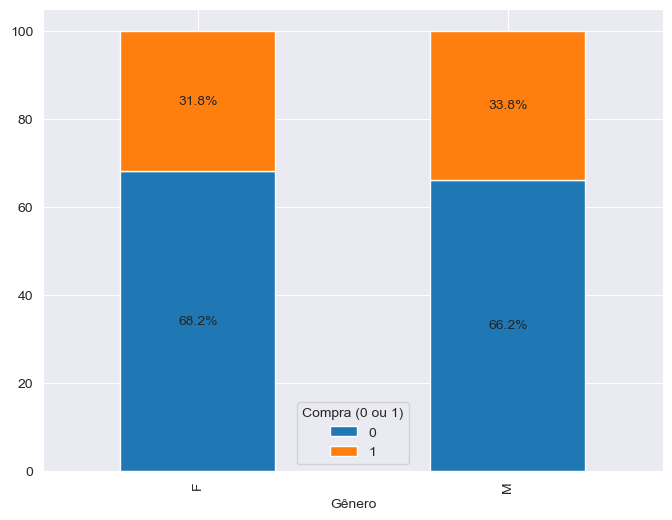

In [1013]:
df_train['Gênero'] = df_train['Gênero'].apply(lambda x: 'M' if x == 1 else 'F')

counts = df_train.groupby(['Gênero', 'Compra (0 ou 1)']).size().unstack(fill_value=0)

percentages = counts.div(counts.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6))

for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    if height > 0:  
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)